In [4]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
import datetime
import numpy as np
import re
from matplotlib.pylab import rcParams
import sqlite3
import seaborn as sns; sns.set()
from tqdm import tqdm
rcParams['figure.figsize'] = 12, 10
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=2.558024, expected=8.900000
predicted=4.929360, expected=10.200000
predicted=7.179815, expected=0.900000
predicted=4.999854, expected=3.400000
predicted=4.434315, expected=9.200000
predicted=6.565355, expected=0.600000
predicted=4.569294, expected=4.100000
predicted=4.023618, expected=5.100000
predicted=4.285243, expected=0.900000
predicted=3.474975, expected=0.200000
predicted=2.149037, expected=4.400000
predicted=2.901095, expected=0.200000
predicted=2.021289, expected=4.400000
predicted=2.674512, expected=-3.700000
predicted=0.263798, expected=1.800000
predicted=1.179536, expected=7.700000
predicted=3.249245, expected=7.300000
predicted=4.433323, expected=8.000000
predicted=5.276384, expected=-0.200000
predicted=3.518956, expected=2.200000
predicted=3.969919, expected=0.100000
predicted=2.910230, expected=-3.300000
predicted=0.754733, expected=-1.900000
predicted=-0.575532, expected=0.600000
predicted=-0.328074, expected=0.000000
predicted=-0.392135, expected=-1.000000
pre

predicted=-5.047569, expected=-3.200000
predicted=-4.596281, expected=-5.500000
predicted=-5.000079, expected=-0.300000
predicted=-3.579283, expected=0.300000
predicted=-2.004980, expected=-4.300000
predicted=-2.621253, expected=-0.200000
predicted=-1.798159, expected=-7.200000
predicted=-3.556467, expected=-1.200000
predicted=-2.310992, expected=-8.900000
predicted=-5.057514, expected=-3.000000
predicted=-4.062887, expected=-7.900000
predicted=-5.835656, expected=-4.200000
predicted=-5.057630, expected=-3.400000
predicted=-4.832387, expected=-5.500000
predicted=-4.990473, expected=-5.000000
predicted=-5.039177, expected=-9.700000
predicted=-6.595673, expected=-6.200000
predicted=-6.184769, expected=-2.300000
predicted=-5.039053, expected=-4.700000
predicted=-5.073140, expected=-5.900000
predicted=-5.582336, expected=-13.100000
predicted=-8.077516, expected=-6.900000
predicted=-7.122142, expected=-8.200000
predicted=-7.681684, expected=-7.100000
predicted=-7.662931, expected=-6.400000


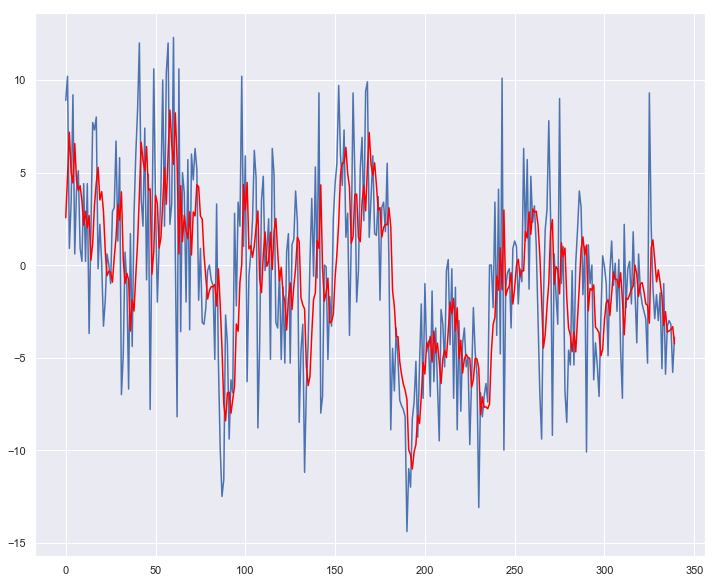

In [20]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [41]:
from pmdarima.arima import auto_arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

ModuleNotFoundError: No module named 'pmdarima'

In [21]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

NameError: name 'smodel' is not defined

C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


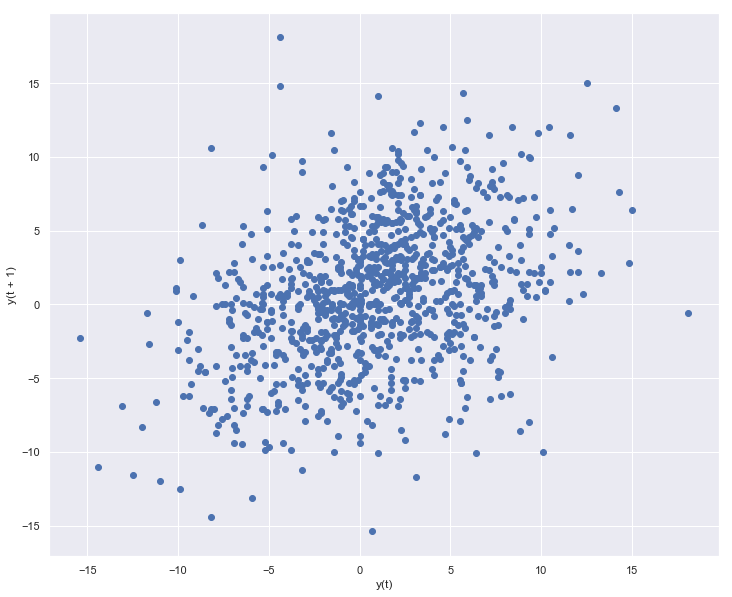

In [5]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
lag_plot(series)
pyplot.show()

In [7]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.374683
t+1  0.374683  1.000000


C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


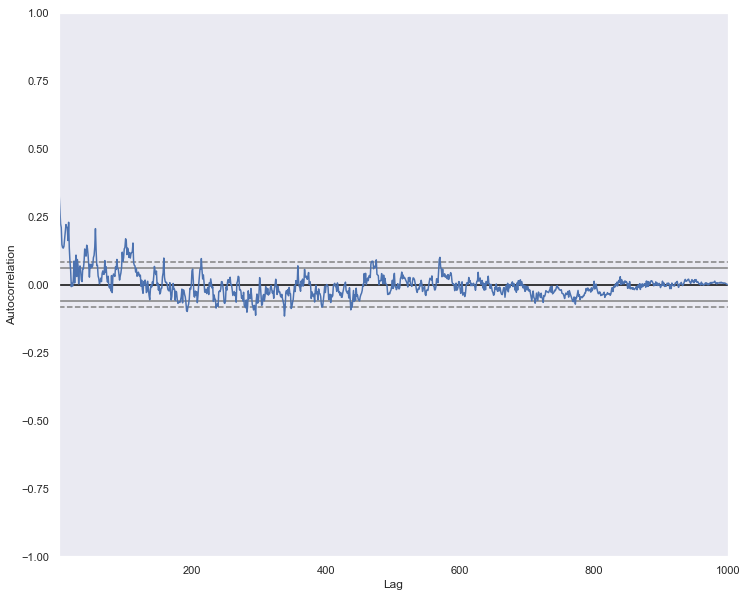

In [8]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
autocorrelation_plot(series)
pyplot.show()

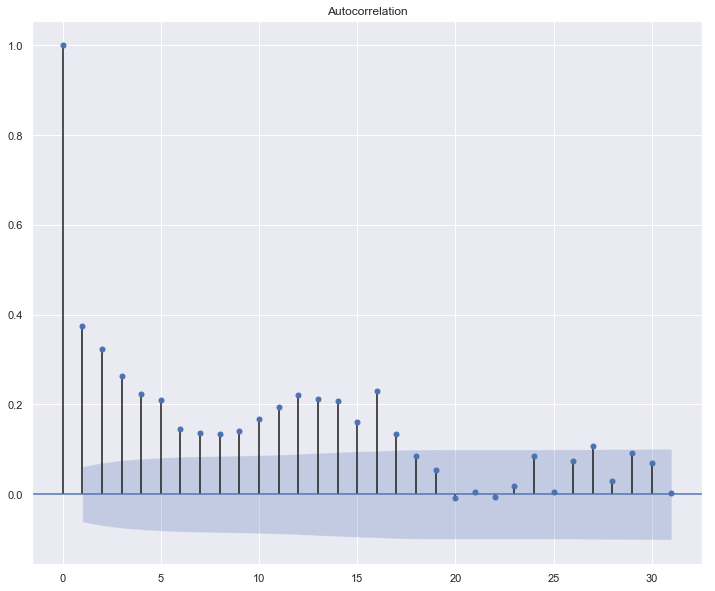

In [9]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
plot_acf(series, lags=31)
pyplot.show()

Test MSE: 8.919


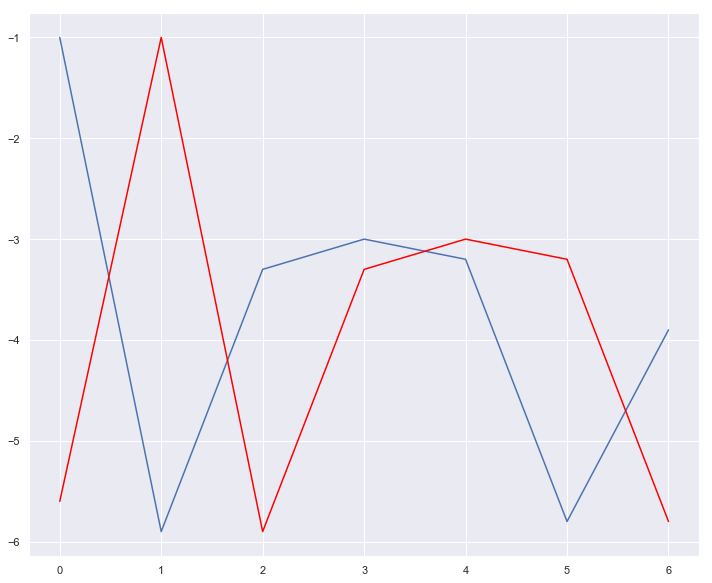

In [16]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 21
Coefficients: [ 0.24968878  0.2252085   0.13659843  0.07546362  0.04851899  0.0611649
 -0.022866    0.00141953  0.00871799  0.02064835  0.03889835  0.0517023
  0.06980772  0.04440538  0.03572407 -0.02194969  0.12589287 -0.01108339
 -0.03723884 -0.02273262 -0.08431474 -0.04066352]
predicted=-2.044930, expected=-1.000000
predicted=-2.284904, expected=-5.900000
predicted=-1.123445, expected=-3.300000
predicted=-0.853549, expected=-3.000000
predicted=-0.452629, expected=-3.200000
predicted=0.201274, expected=-5.800000
predicted=0.081461, expected=-3.900000
Test MSE: 11.846


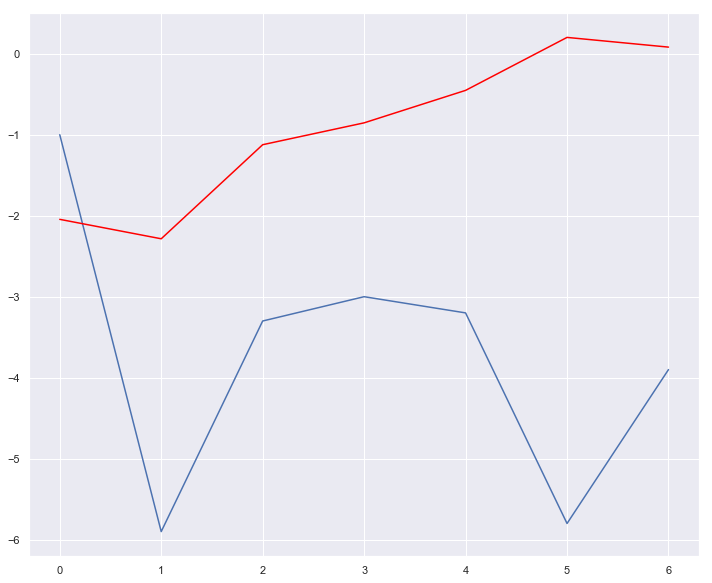

In [17]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=-2.044930, expected=-1.000000
predicted=-2.049577, expected=-5.900000
predicted=-1.794860, expected=-3.300000
predicted=-1.758690, expected=-3.000000
predicted=-1.455451, expected=-3.200000
predicted=-0.986398, expected=-5.800000
predicted=-2.157957, expected=-3.900000
Test MSE: 6.996


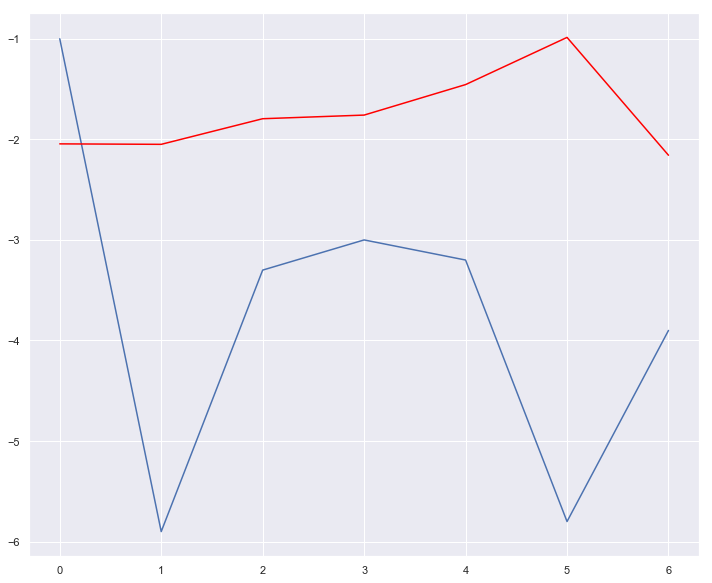

In [18]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.DataFrame(series)
series['meting'] = series['meting'].multiply(1000)
series = series.head(1000)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()